<a href="https://colab.research.google.com/github/krishnapriyababu07/nlp/blob/main/Copy_of_TOPIC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Install necessary libraries
!pip install numpy scikit-learn gensim matplotlib pyLDAvis


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 8.5 MB/s eta 0:00:00


In [2]:
# Import libraries
import numpy as np
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from gensim import corpora
from gensim.models.ldamodel import LdaModel
from gensim.models import Word2Vec
import nltk
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis

In [3]:

# Download stopwords if not already downloaded
nltk.download('stopwords')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [4]:
# Step 1: Load the dataset
newsgroups = fetch_20newsgroups(subset='all', categories=['alt.atheism', 'comp.graphics', 'sci.med', 'sci.space'])
documents = newsgroups.data

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [5]:
# Step 2: Preprocess the text data
stop_words = stopwords.words('english')
vectorizer = CountVectorizer(stop_words=stop_words)
doc_term_matrix = vectorizer.fit_transform(documents)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [6]:
# Step 3: Prepare for LDA with Gensim
tokenized_docs = [doc.split() for doc in documents]
dictionary = corpora.Dictionary(tokenized_docs)
corpus = [dictionary.doc2bow(doc) for doc in tokenized_docs]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [7]:
# Create Gensim LDA model
lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=4, random_state=42, passes=10)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [8]:
# Display the discovered topics
topics = lda_model.print_topics()
for idx, topic in topics:
    print(f"Topic {idx + 1}: {topic}")

Topic 1: 0.022*">" + 0.021*"|" + 0.013*"the" + 0.011*"to" + 0.010*"a" + 0.010*"I" + 0.009*"is" + 0.009*"of" + 0.007*"and" + 0.005*"it"
Topic 2: 0.024*"the" + 0.019*"of" + 0.019*"and" + 0.017*"to" + 0.015*"a" + 0.011*"in" + 0.011*"for" + 0.008*"I" + 0.008*"is" + 0.005*"on"
Topic 3: 0.009*"=" + 0.003*"/" + 0.002*"*" + 0.002*"+" + 0.001*"<>" + 0.001*"}" + 0.001*"{" + 0.001*"&" + 0.001*"(" + 0.001*"???"
Topic 4: 0.042*"the" + 0.025*"of" + 0.024*"to" + 0.020*"a" + 0.017*"and" + 0.016*"is" + 0.013*"that" + 0.012*"in" + 0.010*"I" + 0.007*"it"


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [9]:
# Step 4: LDA Visualization with pyLDAvis
lda_display = gensimvis.prepare(lda_model, corpus, dictionary, sort_topics=False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [10]:
# Display the visualization inline
pyLDAvis.display(lda_display)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [11]:
# Alternatively, save the visualization to an HTML file
pyLDAvis.save_html(lda_display, '/content/lda_visualization.html')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [12]:

# Download the HTML file if needed
from google.colab import files
files.download('/content/lda_visualization.html')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [13]:
# Step 5: Word Embeddings for Document Similarity
word2vec_model = Word2Vec(sentences=tokenized_docs, vector_size=100, window=5, min_count=2, workers=4)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [14]:
# Represent documents as averaged word vectors
def document_vector(doc):
    doc = [word for word in doc if word in word2vec_model.wv.key_to_index]
    return np.mean(word2vec_model.wv[doc], axis=0) if len(doc) > 0 else np.zeros(100)

doc_vectors = [document_vector(doc) for doc in tokenized_docs]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [15]:
# Step 6: Document Similarity and Clustering
similarity_matrix = cosine_similarity(doc_vectors)

kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(similarity_matrix)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=4, random_state=42)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


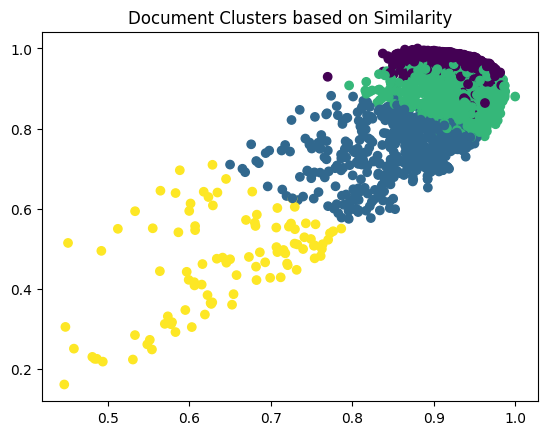

In [16]:
# Visualization of clusters
plt.scatter(similarity_matrix[:, 0], similarity_matrix[:, 1], c=kmeans.labels_)
plt.title('Document Clusters based on Similarity')
plt.show()